# Поиск аномалий. Часть 1.

## Через визуализацию

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

## Box plot (ящик с усами)

In [30]:
import pandas as pd
from sklearn.datasets import load_boston
from matplotlib import pylab as plt
%pylab inline

boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

Populating the interactive namespace from numpy and matplotlib


/Users/irsafilo/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


<AxesSubplot:xlabel='DIS'>

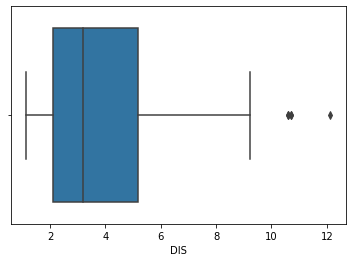

In [31]:
import seaborn as sns
sns.boxplot(x=boston_df['DIS'])

## Scatter plot

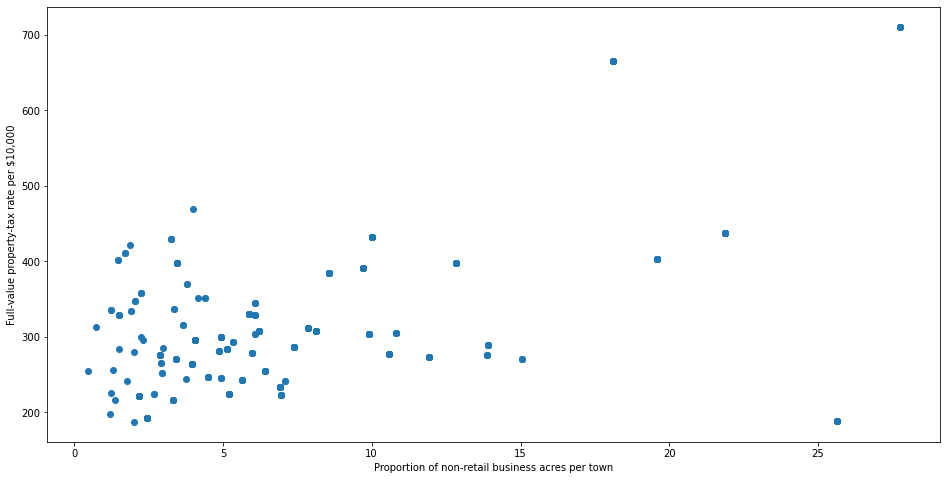

In [32]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

# Z-score

Стандартизованная оценка (z-оценка, англ. : Standard score, z-score) - это мера относительного разброса наблюдаемого или измеренного значения, которая показывает сколько стандартных отклонений составляет его разброс относительного среднего значения.

**Интуиция.**
Вычисляя Z-score, мы масштабируем и центрируем данные и смотрим на точки, которые находятся далеко от 0. Точки, которые достаточно далеко от 0, считаются выбросами. В большинстве случаев используется порог 3 или -3, т.е. если Z-score больше 3 или меньше -3, то точка считается выбросом.

In [33]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(boston_df))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


In [34]:
threshold = 3
print(np.where(z > 3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

Первый массив - список номеров строк, второй - номеров столбцов с выбросами.

In [35]:
print(z[55][1])

3.375038763517309


## IQR

IQR (интерквартильный размах) = Q3 - Q1, где Q1, Q3 - 25%- и 75%- квантили распределения соответственно.

In [40]:
array = np.array([1,2,3,4,5,6,7,8,9,10])

In [41]:
np.quantile(array, 0.5)

5.5

In [42]:
np.quantile(array, 0.75)

7.75

In [43]:
np.quantile(array, 0.25)

3.25

In [36]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


Определяем аутлаеры/выбросы.

In [37]:
print(boston_df < (Q1 - 1.5 * IQR)) | (boston_df > (Q3 + 1.5 * IQR))

      CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     PTRATIO      B  LSTAT  
0      False  False  False  
1      False  Fal

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

# Удаление выбросов

## Z-score

In [44]:
boston_df_o = boston_df[(z < 3).all(axis=1)]

In [45]:
boston_df.shape, boston_df_o.shape

((506, 13), (415, 13))

## IQR

In [46]:
boston_df_o1 = boston_df

In [47]:
boston_df_out = boston_df_o1[~((boston_df_o1 < (Q1 - 2.5 * IQR)) |(boston_df_o1 > (Q3 + 2.5 * IQR))).any(axis=1)]

In [48]:
boston_df_out.shape

(331, 13)

### Удалять или корректировать выбросы?

Это зависит от каждой конкретной задачи.

# Задание

Поработаем с Титаником. Найдите выбросы в каждом столбце (попробуйте наибольшее число из описанных способов).

Изучите найденные выбросы. Подумайте, стоит ли их удалять?

Обучите любой алгоритм на исходных данных с выбросами. Затем удалите те выбросы, которые решили удалить и заново обучите этот же алгоритм. Как удаление выбросов повлияло на качество?

In [15]:
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
#your code here

# Isolation forest

Сгенерируем данные и посмотрим на них

In [49]:
# importing libaries ----
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import savefig
from sklearn.ensemble import IsolationForest
# Generating data ----

rng = np.random.RandomState(42)

# Generating training data 
X_train = 0.2 * rng.randn(1000, 2)
X_train = np.r_[X_train + 3, X_train]
X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])

# Generating new, 'normal' observation
X_test = 0.2 * rng.randn(200, 2)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns = ['x1', 'x2'])

# Generating outliers
X_outliers = rng.uniform(low=-1, high=5, size=(50, 2))
X_outliers = pd.DataFrame(X_outliers, columns = ['x1', 'x2'])

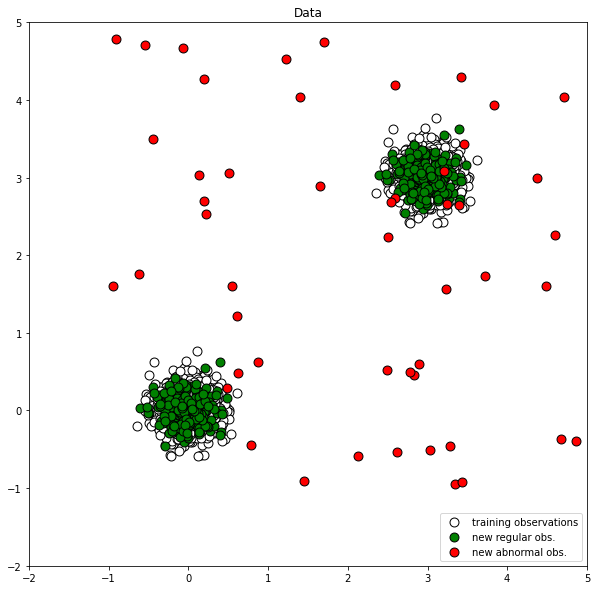

In [50]:
# Plotting generated data ----

plt.figure(figsize=(10,10))
plt.title("Data")

p1 = plt.scatter(X_train.x1, X_train.x2, c='white',
                 s=20*4, edgecolor='k')
p2 = plt.scatter(X_test.x1, X_test.x2, c='green',
                 s=20*4, edgecolor='k')
p3 = plt.scatter(X_outliers.x1, X_outliers.x2, c='red',
                s=20*4, edgecolor='k')

plt.axis('tight')
plt.xlim((-2, 5))
plt.ylim((-2, 5))
plt.legend([p1, p2, p3],
           ["training observations",
            "new regular obs.", "new abnormal obs."],
           loc="lower right")

# saving the figure
plt.savefig('generated_data.png', dpi=300)

plt.show()

Обучим IsolationForest и сделаем предсказание на наших данных

In [53]:
# Isolation Forest ----

# training the model
clf = IsolationForest(max_samples=100, contamination = 0.1, random_state=rng)
clf.fit(X_train)

# predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

In [57]:
X_train

,x1,x2
0,3.099343,2.972347
1,3.129538,3.304606
2,2.953169,2.953173
3,3.315843,3.153487
4,2.906105,3.108512
...,...,...
1995,0.160082,0.150858
1996,0.237783,0.141661
1997,0.070290,0.214030
1998,-0.005304,-0.176375


In [54]:
y_pred_train

array([1, 1, 1, ..., 1, 1, 1])

In [56]:
y_pred_outliers

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [52]:
# new, 'normal' observations
print("Accuracy:", len(y_pred_test[y_pred_test==1])/len(y_pred_test))

Accuracy: 0.93


In [21]:
# outliers
print("Accuracy:", len(y_pred_outliers[y_pred_outliers==-1])/len(y_pred_outliers))

Accuracy: 0.98


Визуализируем найденные выбросы

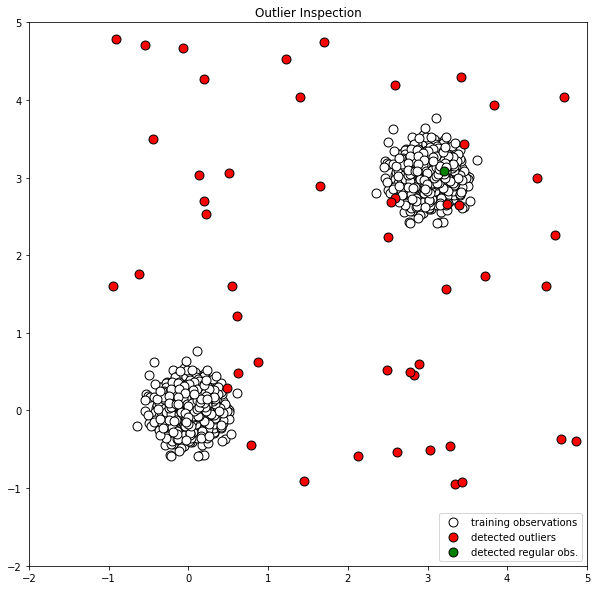

In [58]:
# Inspecting the outliers ----

# adding the predicted label
X_outliers = X_outliers.assign(y = y_pred_outliers)

plt.figure(figsize=(10,10))
plt.title("Outlier Inspection")

p1 = plt.scatter(X_train.x1, X_train.x2, c='white',
                 s=20*4, edgecolor='k')
p2 = plt.scatter(X_outliers.loc[X_outliers.y == -1, ['x1']], 
                 X_outliers.loc[X_outliers.y == -1, ['x2']], 
                 c='red', s=20*4, edgecolor='k')
p3 = plt.scatter(X_outliers.loc[X_outliers.y == 1, ['x1']], 
                 X_outliers.loc[X_outliers.y == 1, ['x2']], 
                 c='green', s=20*4, edgecolor='k')

plt.axis('tight')
plt.xlim((-2, 5))
plt.ylim((-2, 5))
plt.legend([p1, p2, p3],
           ["training observations",
            "detected outliers", 
            "detected regular obs."],
           loc="lower right")

# saving the figure
plt.savefig('outlier_inspection.png', dpi=300)

plt.show()

### Поработаем с датасетом glass https://archive.ics.uci.edu/ml/datasets/Glass+Identification

In [24]:
import csv

# read flash.dat to a list of lists
datContent = [i.strip().split() for i in open("glass.data").readlines()]
datContent = [elem[0].split(',') for elem in datContent]

df = pd.DataFrame(datContent, columns=['id','f1','f2','f3','f4','f5','f6','f7','f8','f9','f10'])
del df['id']
df = df.astype(float)
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0


In [25]:
X = df.copy()
y = df['f10']
del X['f10']

In [26]:
len(X)

214

Посмотрите на качество логистической регрессии на этих данных на кросс-валидации, используйте функцию cross_val_score и 3 фолда.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

#your code here

Удалите выбросы. Предположим, что их не более 10% в наших данных, т.е. используйте IsolationForest с параметром contamination=0.1.

In [28]:
#your code here

Оставьте только точки, которые не являются выбросами по мнению IsolationForest.

In [29]:
#your code here
predictions = model.predict(X) #предсказание того, является объект выбросом или нет

Xnew = ...
ynew = ...

print(len(X), len(Xnew))

NameError: name 'model' is not defined

Заново обучите логистическую регрессию на кросс-валидации. Как изменилось качество?

In [ ]:
#your code here